In [1]:
from Mixture_Models import *

#### Simulating some data

In [2]:
data = make_pinwheel(radial_std=0.3, tangential_std=0.05, num_classes=3,
                         num_per_class=100, rate=0.4,rs=npr.RandomState(0))

#### Initializing the model

In [3]:
test_GMM = GMM(data)

#### Initializing the input parameters

In [4]:
npr.seed(10)
init_params = test_GMM.init_params(num_components=3,scale=0.5)
print(init_params)

{'log proportions': array([ 0.66579325,  0.35763949, -0.77270015]), 'means': array([[-0.00419192,  0.31066799],
       [-0.36004278,  0.13275579],
       [ 0.05427426,  0.00214572]]), 'sqrt_covs': array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]])}


#### Fitting the model with the above initialization parameters

In [5]:
## we are using gradient descent with momentum for 100 iterations with mass = 0.9 and learning rate = 5e-4
params_store = test_GMM.fit(init_params,"grad_descent", learning_rate = 0.0005, mass = 0.9, maxiter = 100) 

Log likelihood -720.8092616186832
Log likelihood -719.9324989689964
Log likelihood -718.2748149395721
Log likelihood -715.9300034638669
Log likelihood -712.9900481929888
Log likelihood -709.5458269817979
Log likelihood -705.6880453853835
Log likelihood -701.5082241387776
Log likelihood -697.0995833835279
Log likelihood -692.5576531321062
Log likelihood -687.9804054374333
Log likelihood -683.467660563424
Log likelihood -679.1194852214626
Log likelihood -675.0333048263767
Log likelihood -671.2995356451652
Log likelihood -667.9957548102311
Log likelihood -665.1797992207992
Log likelihood -662.88269584024
Log likelihood -661.1028521459016
Log likelihood -659.8032389258503
Log likelihood -658.9131007549157
Log likelihood -658.3348876031125
Log likelihood -657.9557758247458
Log likelihood -657.6618055087696
Log likelihood -657.3518342045413
Log likelihood -656.9484866199953
Log likelihood -656.4040216179089
Log likelihood -655.7002839476836
Log likelihood -654.8433206006829
Log likelihood -6

#### Posthoc analysis

In [6]:
### We define an auxillary function for plotting the clusters
def draw_clusters(unpacked_params,input_data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for log_proportion, mean, cov_sqrt in zip(*unpacked_params):
        num_points = 100
        alpha = np.minimum(1.0, np.exp(log_proportion) * 10)
        angles = np.linspace(0, 2*np.pi, num_points)
        circle_pts = np.vstack([np.cos(angles), np.sin(angles)]).T * 2.0
        cur_pts = mean + np.dot(circle_pts, cov_sqrt)
        ax.plot(cur_pts[:, 0], cur_pts[:, 1], '-', alpha=alpha)
        ax.plot(input_data[:, 0], input_data[:, 1], 'k.')
    ax.plot(input_data[:, 0], input_data[:, 1], 'k.')

    plt.show()
    

likelihood -720.8092616186832
aic,bic 1475.6185232373664 1538.5828253065217


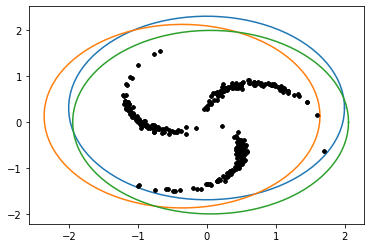

mpkl 0.0
likelihood -719.9324989689964
aic,bic 1473.8649979379927 1536.829300007148


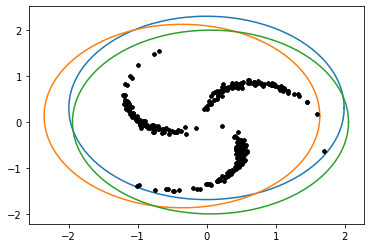

mpkl 0.00022942331022557383
likelihood -718.2748149395721
aic,bic 1470.5496298791443 1533.5139319482996


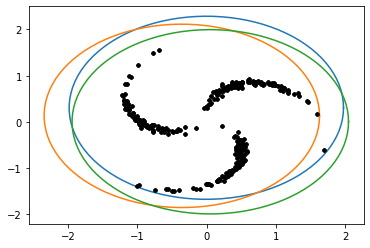

mpkl 0.00065849782513272
likelihood -715.9300034638669
aic,bic 1465.8600069277338 1528.8243089968892


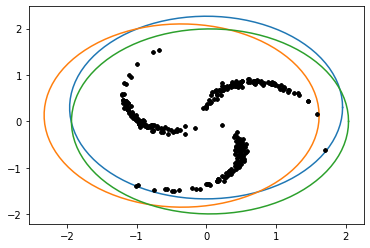

mpkl 0.0012577493548362462
likelihood -712.9900481929888
aic,bic 1459.9800963859775 1522.9443984551328


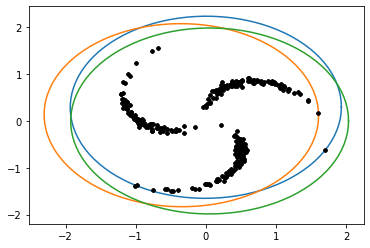

mpkl 0.0020036395698390663
likelihood -709.5458269817979
aic,bic 1453.0916539635957 1516.055956032751


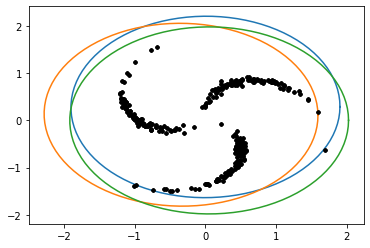

mpkl 0.0028844523252773424
likelihood -705.6880453853835
aic,bic 1445.376090770767 1508.3403928399223


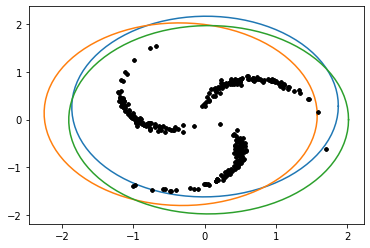

mpkl 0.0039061014528369853
likelihood -701.5082241387776
aic,bic 1437.0164482775551 1499.9807503467105


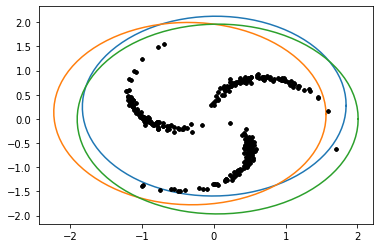

mpkl 0.0050975908384212065
likelihood -697.0995833835279
aic,bic 1428.1991667670559 1491.1634688362112


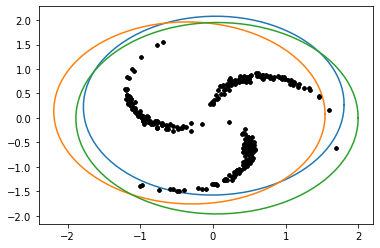

mpkl 0.006515743453741507
likelihood -692.5576531321062
aic,bic 1419.1153062642124 1482.0796083333678


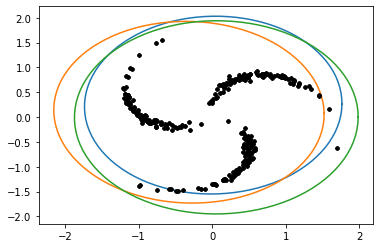

mpkl 0.008248575420026327
likelihood -687.9804054374333
aic,bic 1409.9608108748666 1472.925112944022


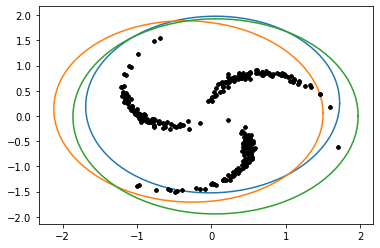

mpkl 0.010416353131524891
likelihood -683.467660563424
aic,bic 1400.935321126848 1463.8996231960034


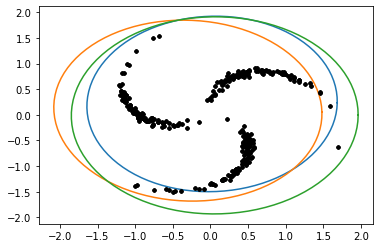

mpkl 0.013168978527018593
likelihood -679.1194852214626
aic,bic 1392.2389704429252 1455.2032725120805


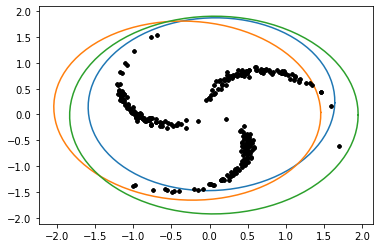

mpkl 0.01667798784740704
likelihood -675.0333048263767
aic,bic 1384.0666096527534 1447.0309117219088


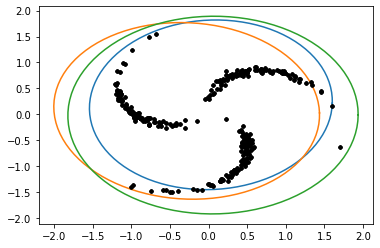

mpkl 0.021121290820669048
likelihood -671.2995356451652
aic,bic 1376.5990712903304 1439.5633733594857


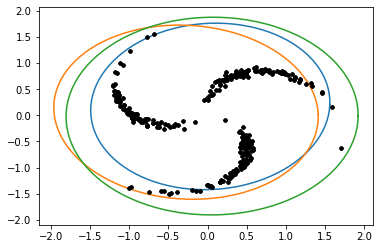

mpkl 0.026659094195678357
likelihood -667.9957548102311
aic,bic 1369.9915096204622 1432.9558116896176


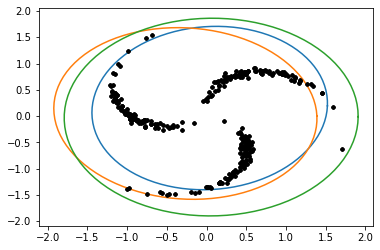

mpkl 0.03340061148303941
likelihood -665.1797992207992
aic,bic 1364.3595984415983 1427.3239005107537


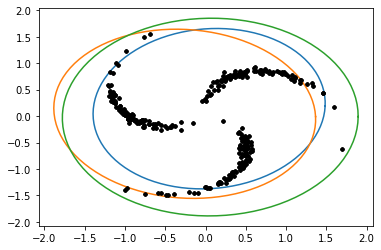

mpkl 0.04136350865263849
likelihood -662.88269584024
aic,bic 1359.76539168048 1422.7296937496353


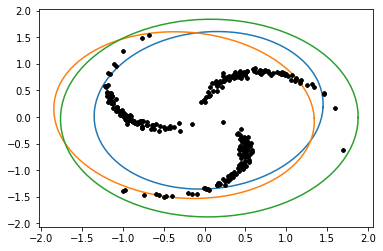

mpkl 0.05043164842887338
likelihood -661.1028521459016
aic,bic 1356.2057042918032 1419.1700063609585


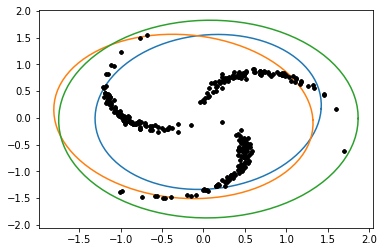

mpkl 0.06032098016413756
likelihood -659.8032389258503
aic,bic 1353.6064778517007 1416.570779920856


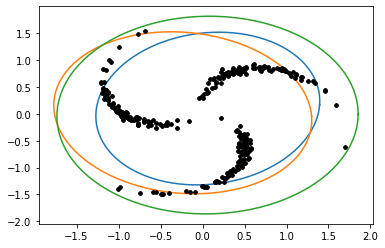

mpkl 0.07056677564368186
likelihood -658.9131007549157
aic,bic 1351.8262015098314 1414.7905035789868


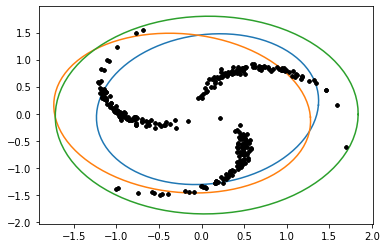

mpkl 0.080545360444084
likelihood -658.3348876031125
aic,bic 1350.669775206225 1413.6340772753804


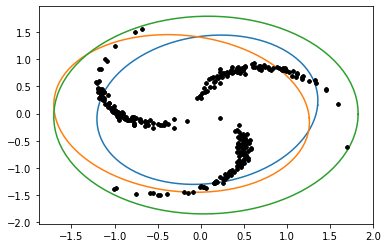

mpkl 0.08953774585901231
likelihood -657.9557758247458
aic,bic 1349.9115516494917 1412.875853718647


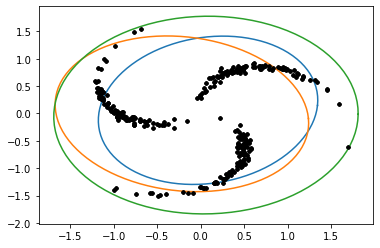

mpkl 0.0968308653242087
likelihood -657.6618055087696
aic,bic 1349.3236110175392 1412.2879130866945


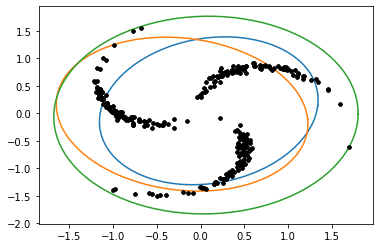

mpkl 0.10183770273244197
likelihood -657.3518342045413
aic,bic 1348.7036684090826 1411.667970478238


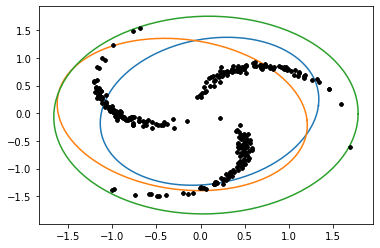

mpkl 0.10420668435013036
likelihood -656.9484866199953
aic,bic 1347.8969732399905 1410.8612753091459


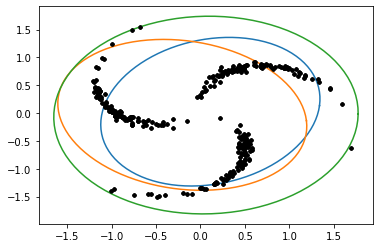

mpkl 0.10388946185166081
likelihood -656.4040216179089
aic,bic 1346.8080432358179 1409.7723453049732


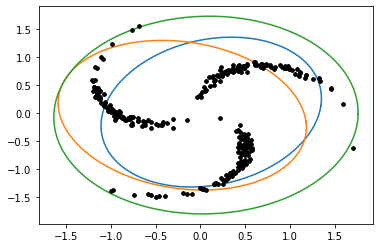

mpkl 0.10114693161714494
likelihood -655.7002839476836
aic,bic 1345.4005678953672 1408.3648699645225


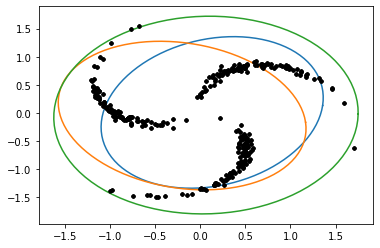

mpkl 0.09775986979019824
likelihood -654.8433206006829
aic,bic 1343.6866412013658 1406.650943270521


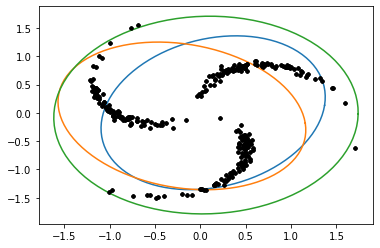

mpkl 0.10683811388353948
likelihood -653.8544379608579
aic,bic 1341.7088759217158 1404.6731779908712


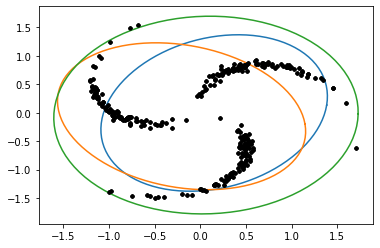

mpkl 0.11646961082497875
likelihood -652.7600866545947
aic,bic 1339.5201733091894 1402.4844753783448


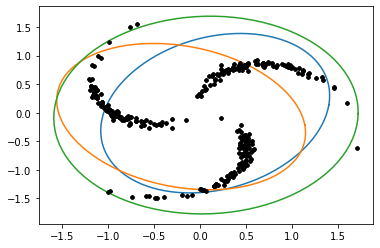

mpkl 0.1268879160126699
likelihood -651.582796679207
aic,bic 1337.165593358414 1400.1298954275694


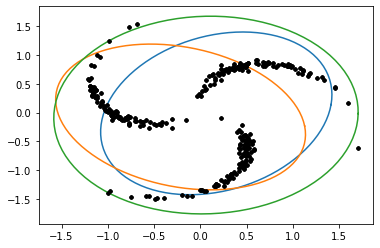

mpkl 0.13842261089117303
likelihood -650.3345799798044
aic,bic 1334.6691599596088 1397.6334620287641


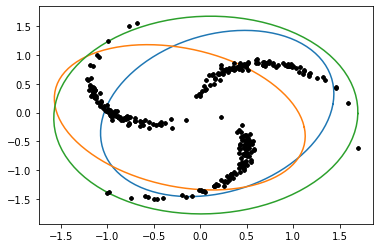

mpkl 0.1515169229644937
likelihood -649.0131686118611
aic,bic 1332.0263372237223 1394.9906392928776


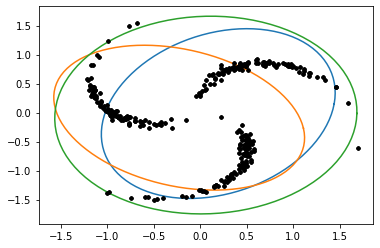

mpkl 0.16675607966796413
likelihood -647.6005850730755
aic,bic 1329.201170146151 1392.1654722153064


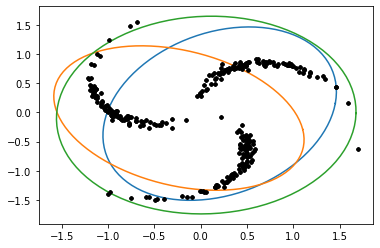

mpkl 0.1849138400152377
likelihood -646.0630742951748
aic,bic 1326.1261485903497 1389.090450659505


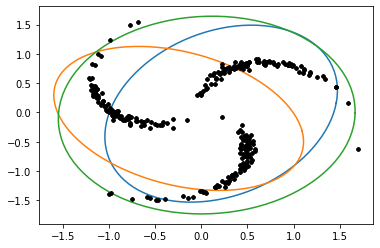

mpkl 0.207027763384092
likelihood -644.3513504892028
aic,bic 1322.7027009784056 1385.667003047561


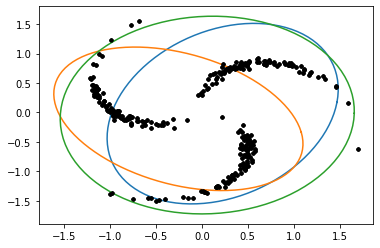

mpkl 0.23451954482465553
likelihood -642.4002714559438
aic,bic 1318.8005429118875 1381.7648449810429


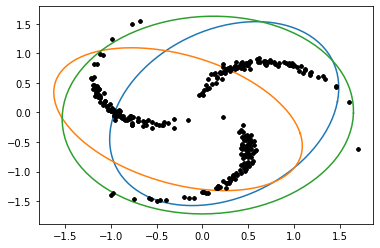

mpkl 0.2693876440810308
likelihood -640.12727888677
aic,bic 1314.25455777354 1377.2188598426953


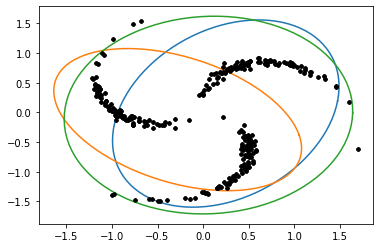

mpkl 0.31452018046913
likelihood -637.4291244751489
aic,bic 1308.8582489502978 1371.8225510194532


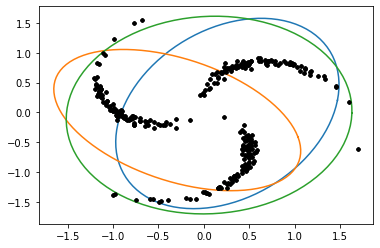

mpkl 0.3742164060334259
likelihood -634.176494153884
aic,bic 1302.352988307768 1365.3172903769234


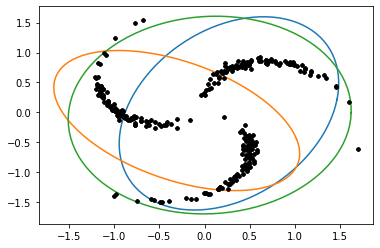

mpkl 0.45508646681461795
likelihood -630.2061599145472
aic,bic 1294.4123198290945 1357.3766218982498


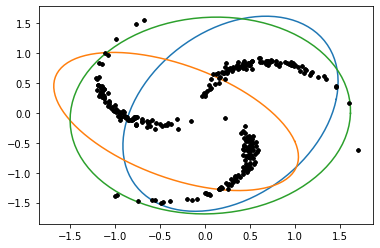

mpkl 0.5676717711786858
likelihood -625.3104086368007
aic,bic 1284.6208172736015 1347.5851193427568


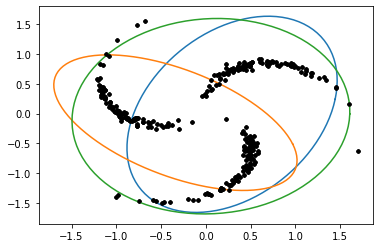

mpkl 0.7580533931086211
likelihood -619.2247622941563
aic,bic 1272.4495245883127 1335.413826657468


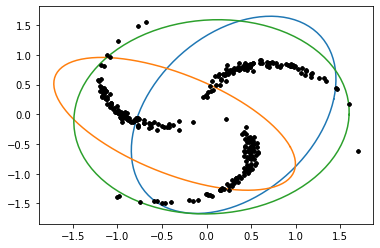

mpkl 1.0593118478515553
likelihood -611.6214914638101
aic,bic 1257.2429829276202 1320.2072849967756


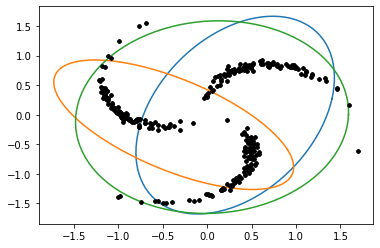

mpkl 1.5389213713192929
likelihood -602.134335973347
aic,bic 1238.268671946694 1301.2329740158493


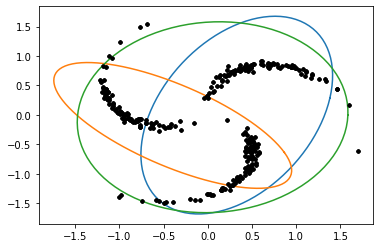

mpkl 2.3546241004604838
likelihood -590.4502973454537
aic,bic 1214.9005946909074 1277.8648967600627


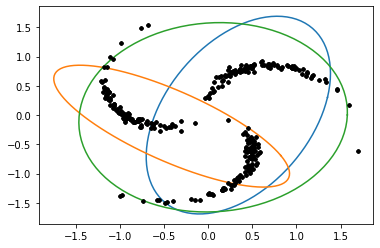

mpkl 3.8623287468473877
likelihood -576.5214283372421
aic,bic 1187.0428566744843 1250.0071587436396


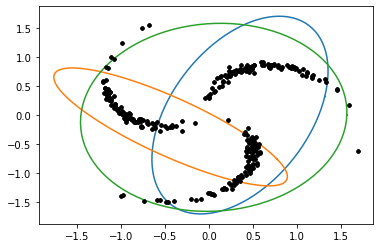

mpkl 6.979799274409501
likelihood -560.8763435657723
aic,bic 1155.7526871315447 1218.7169892007


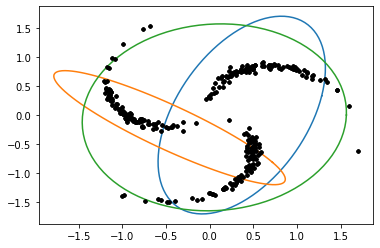

mpkl 14.583930766988896
likelihood -545.7548815517191
aic,bic 1125.5097631034382 1188.4740651725936


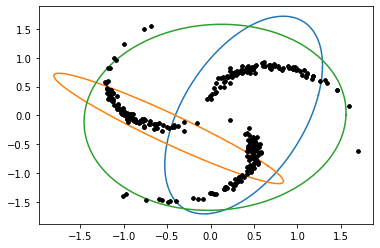

mpkl 39.35560551461084
likelihood -557.5787187864321
aic,bic 1149.1574375728642 1212.1217396420195


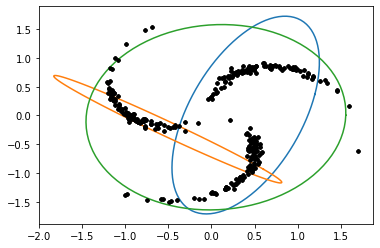

mpkl 171.60763084078232
likelihood -552.9499535266327
aic,bic 1139.8999070532655 1202.8642091224208


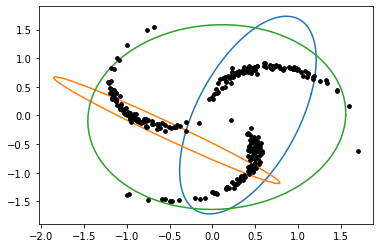

mpkl 147.69117154935398
likelihood -542.0578600300126
aic,bic 1118.1157200600253 1181.0800221291806


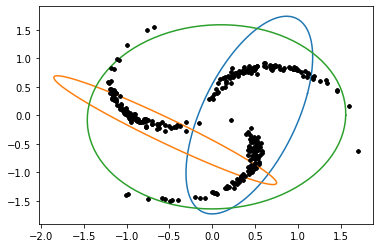

mpkl 61.03323522275526
likelihood -538.7952832949012
aic,bic 1111.5905665898024 1174.5548686589577


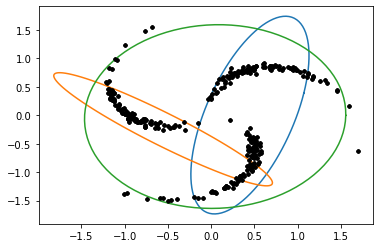

mpkl 30.014177456385177
likelihood -540.0509343382073
aic,bic 1114.1018686764146 1177.06617074557


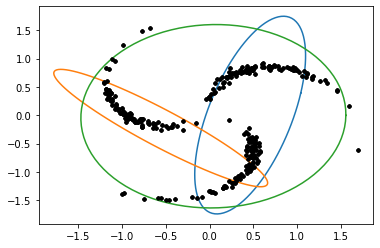

mpkl 20.198284925832617
likelihood -540.1047083135684
aic,bic 1114.2094166271368 1177.173718696292


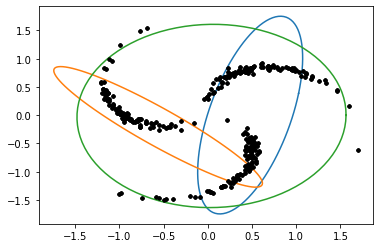

mpkl 19.004739839442465
likelihood -538.3920941446917
aic,bic 1110.7841882893833 1173.7484903585387


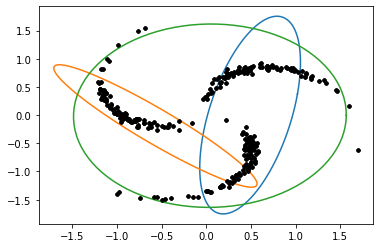

mpkl 24.90970970006291
likelihood -534.537647432514
aic,bic 1103.075294865028 1166.0395969341832


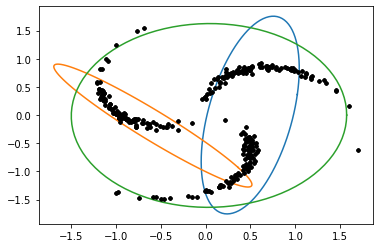

mpkl 40.43855534852782
likelihood -525.1460662219928
aic,bic 1084.2921324439856 1147.256434513141


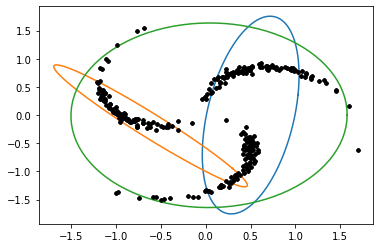

mpkl 69.51349278467383
likelihood -517.0542202917712
aic,bic 1068.1084405835425 1131.0727426526978


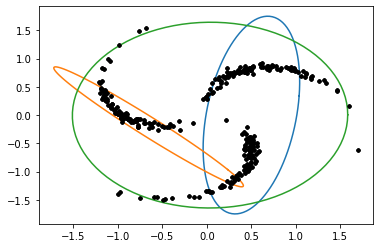

mpkl 120.1611961802765
likelihood -526.1145493153929
aic,bic 1086.2290986307858 1149.193400699941


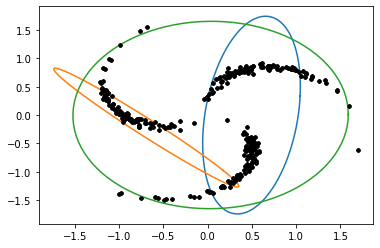

mpkl 162.6053572080947
likelihood -518.8489300488307
aic,bic 1071.6978600976613 1134.6621621668166


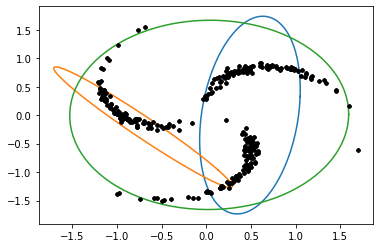

mpkl 112.25388122898477
likelihood -512.8972178891287
aic,bic 1059.7944357782574 1122.7587378474127


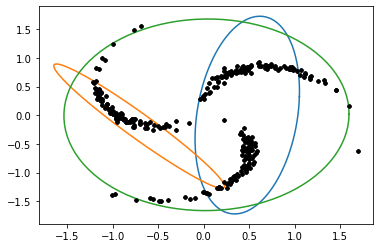

mpkl 82.07238864431872
likelihood -514.4391052085055
aic,bic 1062.878210417011 1125.8425124861662


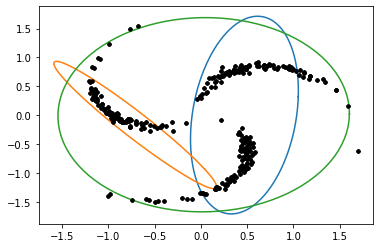

mpkl 82.33359327519071
likelihood -515.9467825935967
aic,bic 1065.8935651871934 1128.8578672563488


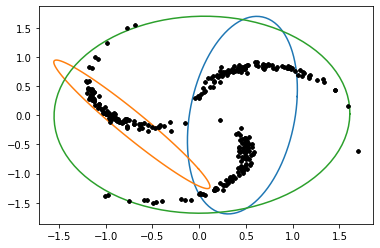

mpkl 88.37558305583532
likelihood -510.4281468764623
aic,bic 1054.8562937529246 1117.82059582208


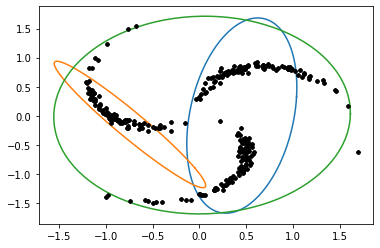

mpkl 84.21832257922136
likelihood -506.309337989921
aic,bic 1046.618675979842 1109.5829780489973


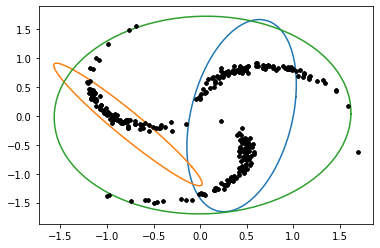

mpkl 89.37520756177877
likelihood -504.6531478482633
aic,bic 1043.3062956965266 1106.270597765682


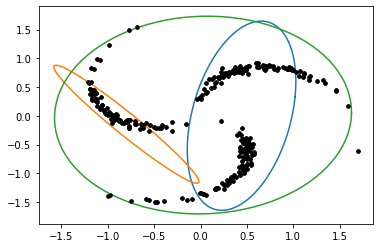

mpkl 124.94708962827134
likelihood -503.71436357935914
aic,bic 1041.4287271587182 1104.3930292278737


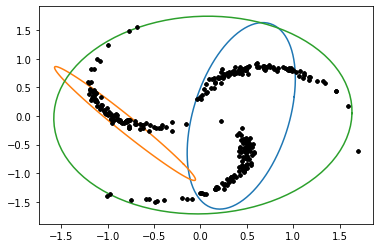

mpkl 231.047965081349
likelihood -499.7981319395969
aic,bic 1033.5962638791939 1096.5605659483492


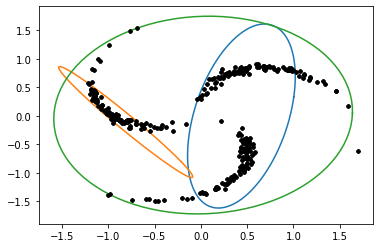

mpkl 262.4403076178879
likelihood -496.79322333167045
aic,bic 1027.586446663341 1090.5507487324962


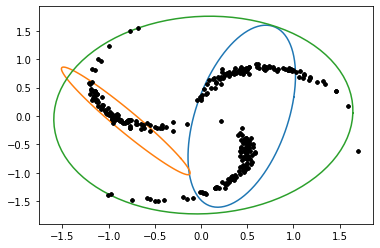

mpkl 132.82622472273835
likelihood -495.83276956071296
aic,bic 1025.6655391214258 1088.6298411905814


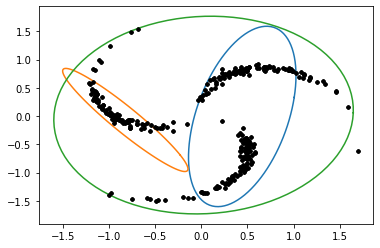

mpkl 85.83141763532868
likelihood -493.04689889900925
aic,bic 1020.0937977980185 1083.058099867174


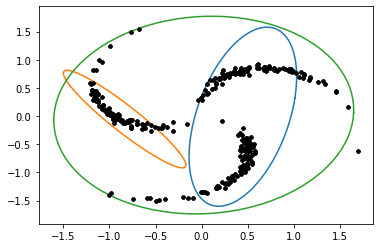

mpkl 74.97583934088391
likelihood -487.38128375749045
aic,bic 1008.7625675149809 1071.7268695841362


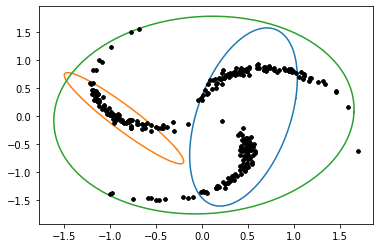

mpkl 87.88227977533727
likelihood -480.81144234302405
aic,bic 995.6228846860481 1058.5871867552034


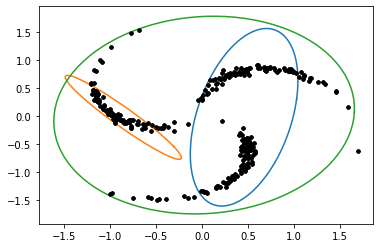

mpkl 139.13285803701734
likelihood -481.93675134581196
aic,bic 997.8735026916239 1060.8378047607794


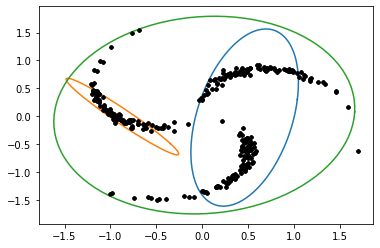

mpkl 224.70344871685555
likelihood -474.1757408290123
aic,bic 982.3514816580246 1045.31578372718


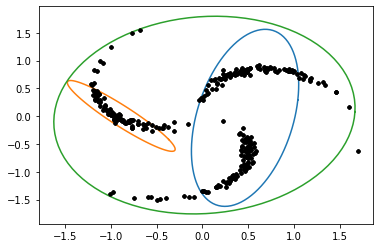

mpkl 107.85453121955298
likelihood -472.880785750509
aic,bic 979.761571501018 1042.7258735701735


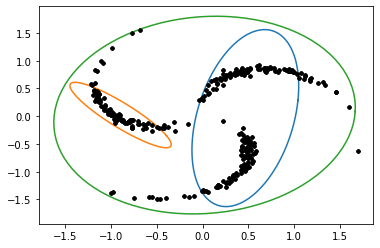

mpkl 72.46716309209998
likelihood -469.2855044181588
aic,bic 972.5710088363176 1035.535310905473


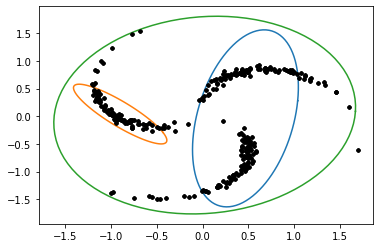

mpkl 71.24421295459055
likelihood -464.39114152547813
aic,bic 962.7822830509563 1025.7465851201116


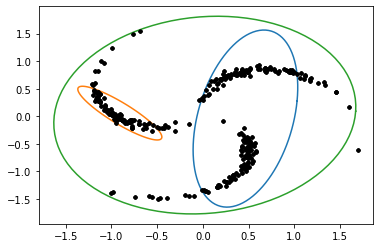

mpkl 97.3129266340963
likelihood -464.1262006850039
aic,bic 962.2524013700078 1025.2167034391632


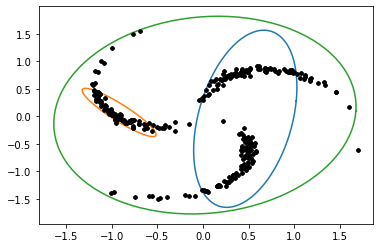

mpkl 159.77086095243652
likelihood -459.5986336992522
aic,bic 953.1972673985044 1016.1615694676599


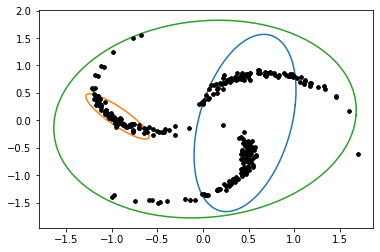

mpkl 153.96578077313043
likelihood -463.21083585301164
aic,bic 960.4216717060233 1023.3859737751787


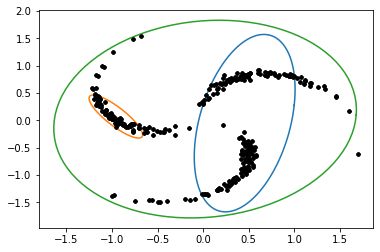

mpkl 171.43229221558417
likelihood -467.07316935158565
aic,bic 968.1463387031713 1031.1106407723266


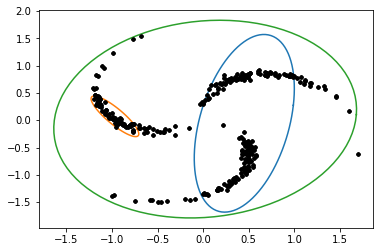

mpkl 252.59044154292297
likelihood -466.3786838127069
aic,bic 966.7573676254138 1029.7216696945693


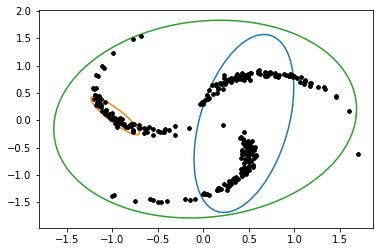

mpkl 311.47740669449286
likelihood -464.68042674568875
aic,bic 963.3608534913775 1026.325155560533


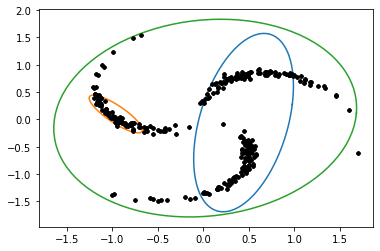

mpkl 174.1024581490272
likelihood -464.22752963391304
aic,bic 962.4550592678261 1025.4193613369814


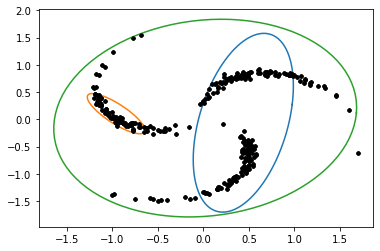

mpkl 131.24202566137686
likelihood -460.8368360423061
aic,bic 955.6736720846122 1018.6379741537677


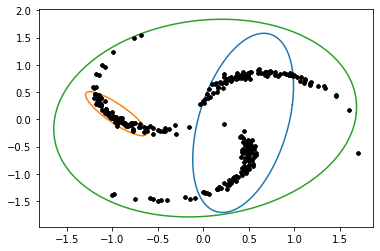

mpkl 140.36749789277832
likelihood -458.54663676806285
aic,bic 951.0932735361257 1014.0575756052812


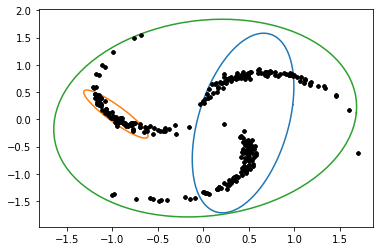

mpkl 196.20950742632448
likelihood -459.79613766462984
aic,bic 953.5922753292597 1016.5565773984151


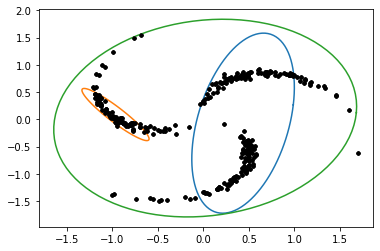

mpkl 241.0941895783922
likelihood -460.32717742927565
aic,bic 954.6543548585513 1017.6186569277068


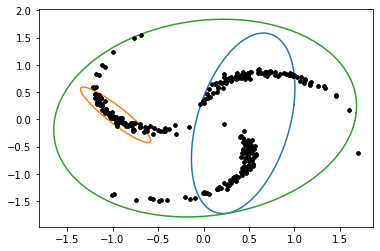

mpkl 185.7942134371915
likelihood -460.46190677130545
aic,bic 954.9238135426109 1017.8881156117664


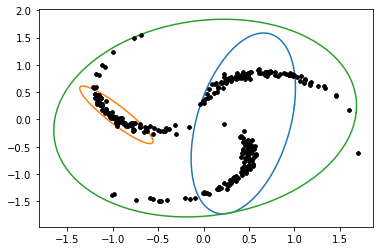

mpkl 160.43576224987984
likelihood -460.43135878286716
aic,bic 954.8627175657343 1017.8270196348898


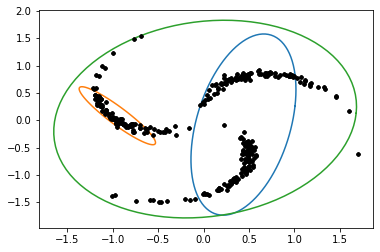

mpkl 171.05835769159177
likelihood -461.00300583656065
aic,bic 956.0060116731213 1018.9703137422767


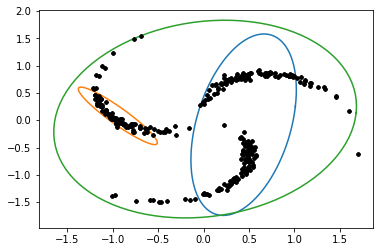

mpkl 178.4398128586472
likelihood -460.31408472166686
aic,bic 954.6281694433337 1017.5924715124892


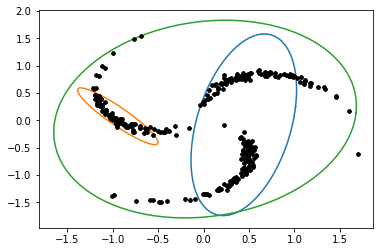

mpkl 147.82599578399896
likelihood -460.4857895176704
aic,bic 954.9715790353408 1017.9358811044963


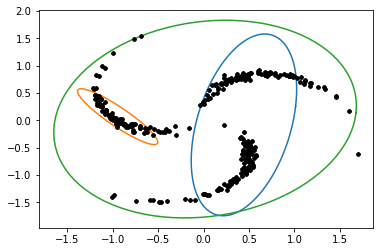

mpkl 134.66258451582456
likelihood -459.60792585888015
aic,bic 953.2158517177603 1016.1801537869158


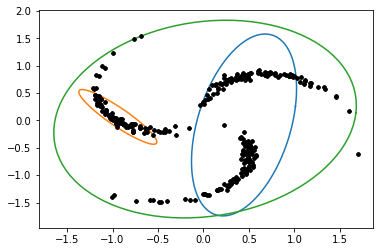

mpkl 147.34856808400946
likelihood -458.5285921960289
aic,bic 951.0571843920578 1014.0214864612133


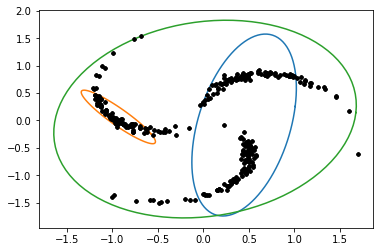

mpkl 177.82390871135345
likelihood -458.0932767136612
aic,bic 950.1865534273225 1013.1508554964779


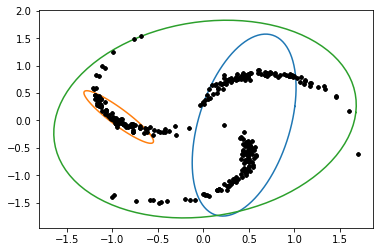

mpkl 187.67862021907786
likelihood -457.76270309967555
aic,bic 949.5254061993511 1012.4897082685065


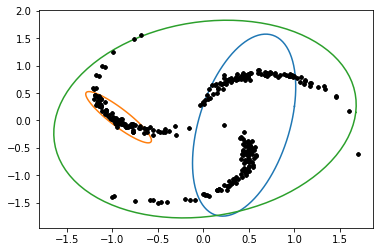

mpkl 171.21401995601494


In [7]:
for params in params_store:
    print("likelihood",test_GMM.likelihood(params))
    print("aic,bic",test_GMM.aic(params),test_GMM.bic(params))
    

    draw_clusters(test_GMM.unpack_params(params),data)
    kl_cov = []
    for log_proportion, mean, cov_sqrt in zip(*test_GMM.unpack_params(params)):
        kl_cov.append(cov_sqrt.T @ cov_sqrt)
    print("mpkl",test_GMM.print_mpkl(params['means'],kl_cov))

In [8]:
### Final labels

np.array(test_GMM.labels(data,params_store[-1]))

array([2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])